In [1]:
!ls *.yaml

CHLAT_20210605.yaml    SAT_LFMF_20210623.yaml SPLAT_20210605.yaml
CHLAT_20210714.yaml    SAT_LFMF_20210714.yaml SPLAT_20210714.yaml
SAT_HF_20210623.yaml   SAT_pole_20210605.yaml
SAT_HF_20210714.yaml   SAT_pole_20210623.yaml


In [2]:
# Standard imports
import numpy as np
import yaml
import toml
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline  
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 20]

# bolo-calc import
from bolo import Top

import BoloCalcVariation as bcv

In [3]:
# Set up inputs

# yaml files to use
telescopes = dict.fromkeys(['CHLAT_20210714.yaml','SPLAT_20210714.yaml','SAT_LFMF_20210714.yaml','SAT_HF_20210714.yaml'])

#read fixed PSATs from .toml file
psat = toml.load("FixedPsats.toml")

# input parameter to vary
xparam_name = 'elevation'
xparam_vec = np.arange(30,70,1)
# in_param possible values:
#  'band_response', 'num_wafer_per_optics_tube', 'num_optics_tube', 
#  'waist_factor', 'psat', 'psat_factor', 'carrier_index', 'Tc', 'Tc_fraction', 
#  'G', 'Flink', 'Yield', 'response_factor', 'bolo_resistance', 'read_frac'

# output parameter to plot and save.
yparam_name = 'NET' #
# out_param possible values:
#  'effic', 'opt_power','tel_rj_temp','sky_rj_temp','NEP_bolo',
#  'NEP_read','NEP_ph','NEP','NET','NET_corr','corr_fact','NET_arr'

# Run CHLAT

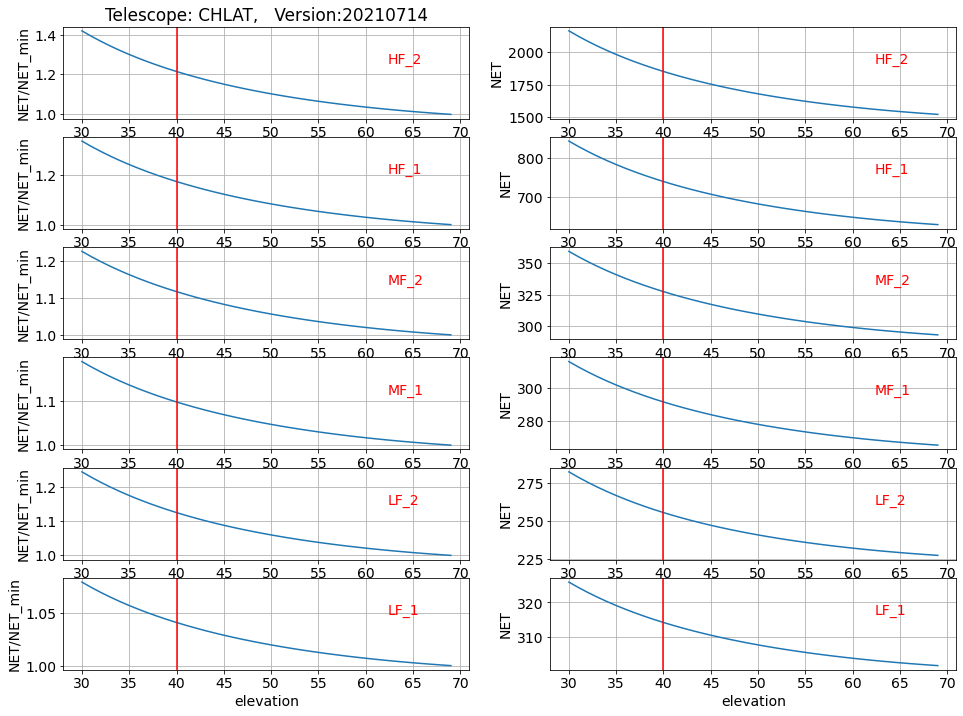

In [4]:
yaml_file = list(telescopes.keys())[0]
dd = yaml.safe_load(open(yaml_file))
# location of atmosphere file
dd['sim_config']['config_dir'] = '../../bolo-calc/config'
dd['version']['yaml']=yaml_file

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [16, 24]
channel_dict = bcv.vary_param_at_fixed_psat(xparam_name,xparam_vec,yparam_name,dd,psat)[1]
telescopes[yaml_file] = channel_dict

# Run SPLAT

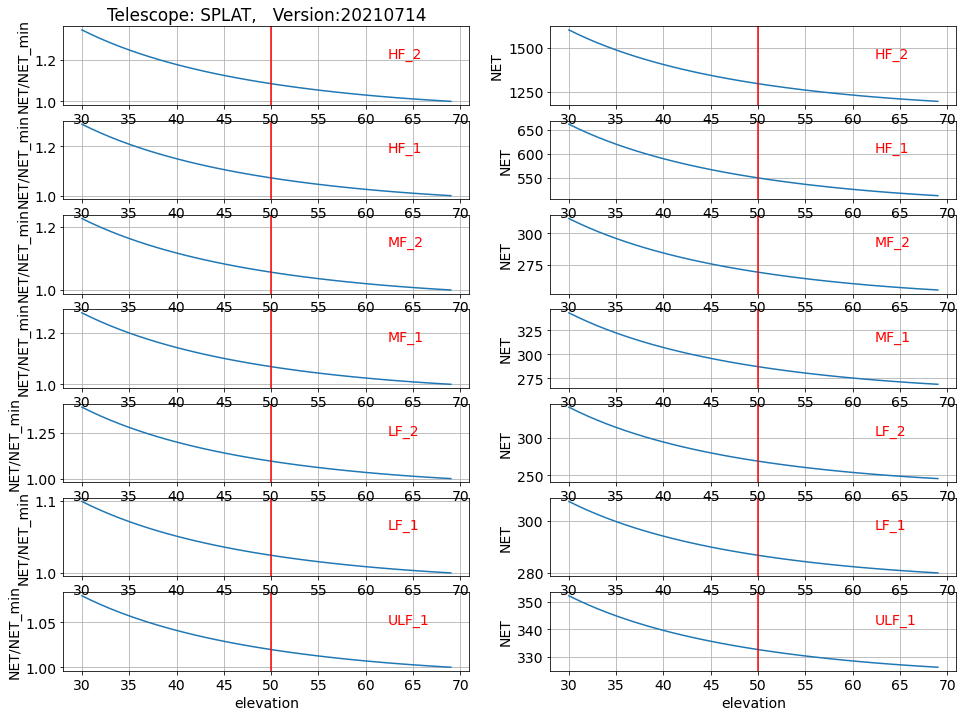

In [5]:
yaml_file = list(telescopes.keys())[1]
dd = yaml.safe_load(open(yaml_file))
# location of atmosphere file
dd['sim_config']['config_dir'] = '../../bolo-calc/config'
dd['version']['yaml']=yaml_file

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [16, 24]
channel_dict = bcv.vary_param_at_fixed_psat(xparam_name,xparam_vec,yparam_name,dd,psat)[1]
telescopes[yaml_file] = channel_dict

# Run SAT LFMF

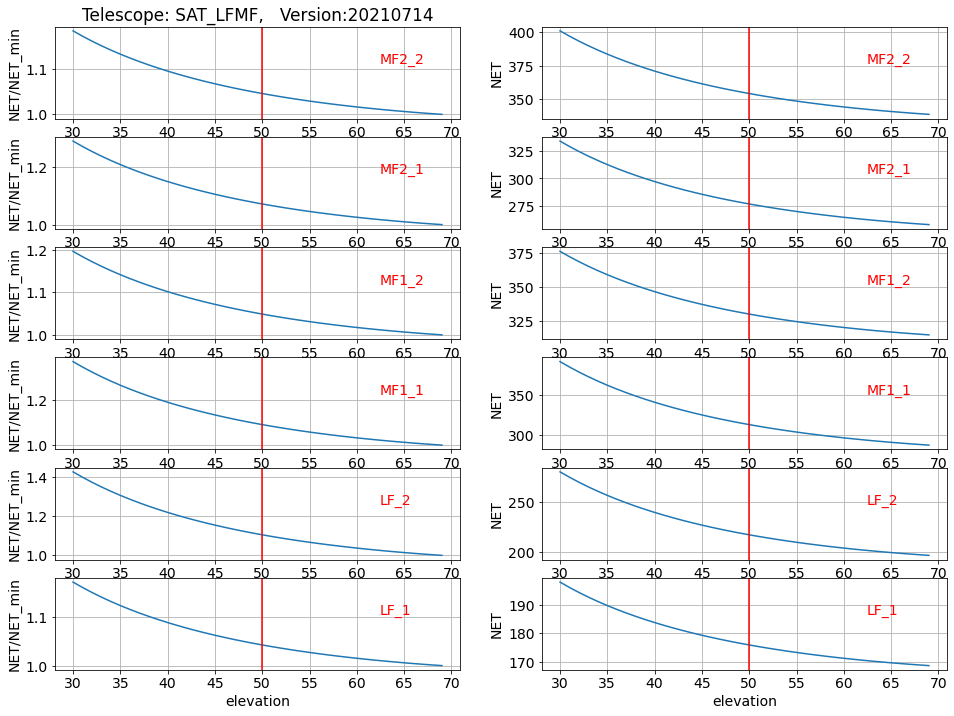

In [6]:
yaml_file = list(telescopes.keys())[2]
dd = yaml.safe_load(open(yaml_file))
# location of atmosphere file
dd['sim_config']['config_dir'] = '../../bolo-calc/config'
dd['version']['yaml']=yaml_file

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [16, 24]
channel_dict = bcv.vary_param_at_fixed_psat(xparam_name,xparam_vec,yparam_name,dd,psat)[1]
telescopes[yaml_file] = channel_dict

# Run SAT HF

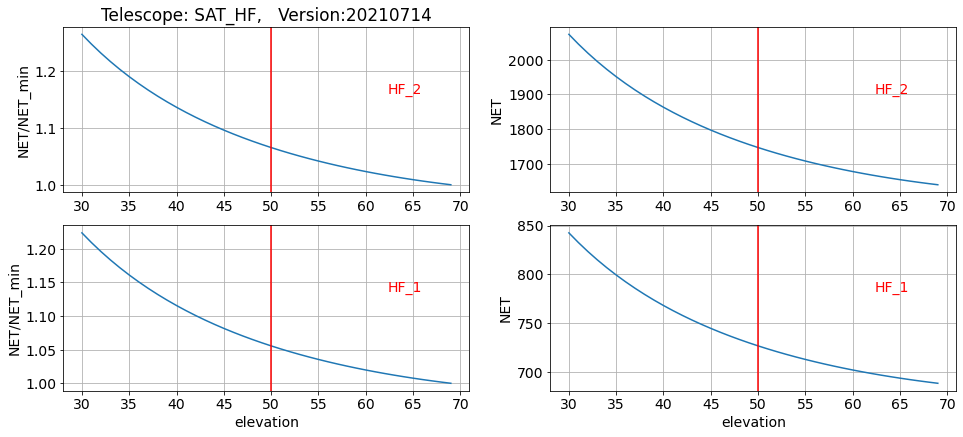

In [7]:
yaml_file = list(telescopes.keys())[3]
dd = yaml.safe_load(open(yaml_file))
# location of atmosphere file
dd['sim_config']['config_dir'] = '../../bolo-calc/config'
dd['version']['yaml']=yaml_file

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [16, 14]
channel_dict = bcv.vary_param_at_fixed_psat(xparam_name,xparam_vec,yparam_name,dd,psat)[1]
telescopes[yaml_file] = channel_dict

In [8]:
telescopes["runtime"] = datetime.today().strftime('%Y/%m/%d %H:%M:%S')
#telescopes["input_id"] = version_date
telescopes["variation"] = yparam_name + '_v_' + xparam_name

output_file_name = telescopes['variation'] + '.toml'

with open('outputs/' + output_file_name, "w") as toml_file:
    toml.dump(telescopes, toml_file, encoder=toml.TomlNumpyEncoder())

In [9]:
telescopes

{'CHLAT_20210714.yaml': {'LF_1': {'elevation': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
          47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
          64, 65, 66, 67, 68, 69]),
   'NET': array([325.89001747, 324.34277836, 322.90153883, 321.55642121,
          320.29874972, 319.12086785, 318.01599078, 316.9780989 ,
          316.00182324, 315.08235329, 314.21538958, 313.39706073,
          312.62386634, 311.89265733, 311.20057268, 310.54501209,
          309.92362394, 309.33424497, 308.77492237, 308.24384572,
          307.73937189, 307.25998955, 306.80430828, 306.37104891,
          305.95903152, 305.56716573, 305.19446044, 304.83996953,
          304.50283925, 304.18227728, 303.8775405 , 303.58794814,
          303.31286455, 303.0516961 , 302.80389564, 302.56895834,
          302.34640476, 302.13579884, 301.9367323 , 301.74883076]),
   'xdefault': 40.0},
  'LF_2': {'elevation': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40